In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
international_trade = pd.read_csv("../data/international_trade.csv")

In [8]:
train

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [7]:
test

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J
...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J
1088,RD_F_J_20230328,2023-03-28,RD,F,J
1089,RD_F_J_20230329,2023-03-29,RD,F,J
1090,RD_F_J_20230330,2023-03-30,RD,F,J


In [25]:
international_trade

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990
1,2019-01,양파,821330,222,4003206,1118,-896
2,2019-01,쪽파,60,1,93405,128,-127
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38
...,...,...,...,...,...,...,...
1269,2023-02,포포(papaw)[파파야(papaya)],0,0,23830,71,-71
1270,2023-02,사과,135165,351,0,0,351
1271,2023-02,배,2206012,5411,1,0,5411
1272,2023-02,신 체리[프루너스 체라서스(Prunus cerasus)],5,0,0,0,0


In [3]:
international_trade['품목명'].unique()

array(['토마토(신선한 것이나 냉장한 것으로 한정한다)', '양파', '쪽파', '꽃양배추와 브로콜리(broccoli)',
       '방울다다기 양배추', '양배추', '결구(結球) 상추',
       '위트루프 치커리(Witloof chicory)[시코리엄 인티부스 변종 포리오섬(Cichorium intybus var. foliosum)]',
       '당근', '오이류(신선한 것이나 냉장한 것으로 한정한다)',
       '콩[비그나(Vigna)속ㆍ파세러스(Phaseolus)속)]', '대추야자', '무화과', '파인애플',
       '망고(mango)', '망고스틴(mangosteen)', '오렌지', '감귤',
       '그레이프프루트(grapefruit)와 포멜로(pomelo)',
       '레몬[시트러스 리몬(Citrus limon)ㆍ시트러스 리머늄(Citrus limonum)]', '수박',
       '포포(papaw)[파파야(papaya)]', '사과', '배', '자두',
       '완두[피섬 새티범(Pisum sativum)]', '구아바(guava)', '살구',
       '신 체리[프루너스 체라서스(Prunus cerasus)]', '복숭아[넥터린(nectarine)을 포함한다]',
       '순무', '방울토마토', '샬롯(shallot)', '참외'], dtype=object)

<Axes: xlabel='기간'>

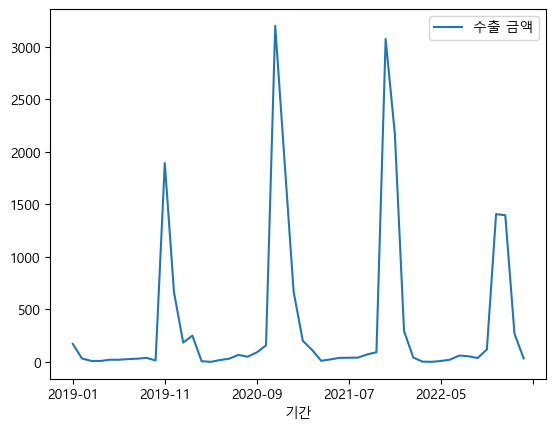

In [14]:
international_trade[international_trade['품목명'] == '감귤'][['기간', '수출 금액']].plot(x="기간")

In [3]:
data = train.loc[(train['item'] == "TG") & (train['corporation'] == "A")& (train['location'] == "S"), ['timestamp', 'supply(kg)', "price(원/kg)"]]

In [41]:
data['day_name'] = pd.to_datetime(data['timestamp']).dt.day_name()
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [89]:
import holidays
from datetime import date
kr_holidays = holidays.Korea

In [87]:
kr_holidays(2019).keys()     

dict_keys([datetime.date(2019, 1, 1), datetime.date(2019, 2, 5), datetime.date(2019, 2, 4), datetime.date(2019, 2, 6), datetime.date(2019, 3, 1), datetime.date(2019, 5, 12), datetime.date(2019, 5, 5), datetime.date(2019, 5, 6), datetime.date(2019, 5, 1), datetime.date(2019, 6, 6), datetime.date(2019, 8, 15), datetime.date(2019, 9, 13), datetime.date(2019, 9, 12), datetime.date(2019, 9, 14), datetime.date(2019, 10, 3), datetime.date(2019, 10, 9), datetime.date(2019, 12, 25)])

In [78]:
len(list(kr_holidays))

TypeError: 'EntityLoader' object is not iterable

In [94]:
data['timestamp']

1523   2019-01-01
1524   2019-01-02
1525   2019-01-03
1526   2019-01-04
1527   2019-01-05
          ...    
3041   2023-02-27
3042   2023-02-28
3043   2023-03-01
3044   2023-03-02
3045   2023-03-03
Name: timestamp, Length: 1523, dtype: datetime64[ns]

In [96]:
date.fromisoformat(str(data.loc[1523,'timestamp']))

ValueError: Invalid isoformat string: '2019-01-01 00:00:00'

In [76]:
data['holiday'] = data['timestamp'].apply(lambda x: 'holiday' if x in kr_holidays else 'non-holiday')

TypeError: argument of type 'EntityLoader' is not iterable

In [73]:
holiday_2019.sum()

0

In [37]:
list(data.columns)

['timestamp', 'supply(kg)', 'price(원/kg)', 'day_name']

In [22]:
data.head(50)

,timestamp,supply(kg),price(원/kg),day_name
1523,2019-01-01,0.0,0.0,Tuesday
1524,2019-01-02,0.0,0.0,Wednesday
1525,2019-01-03,190591.0,2526.0,Thursday
1526,2019-01-04,137729.0,2134.0,Friday
1527,2019-01-05,134039.0,2075.0,Saturday
1528,2019-01-06,0.0,0.0,Sunday
1529,2019-01-07,180331.0,2181.0,Monday
1530,2019-01-08,106258.0,2029.0,Tuesday
1531,2019-01-09,110506.0,1998.0,Wednesday
1532,2019-01-10,84063.0,2023.0,Thursday


In [5]:
data['supply(kg)'] * data['price(원/kg)']

1523            0.0
1524            0.0
1525    481432866.0
1526    293913686.0
1527    278130925.0
           ...     
3041    205992036.0
3042    127867055.0
3043    143496951.0
3044    165021966.0
3045    143180424.0
Length: 1523, dtype: float64

In [5]:
train.item.unique()

array(['TG', 'CR', 'CB', 'RD', 'BC'], dtype=object)

* TG : 감귤
* BC : 브로콜리
* RD : 무
* CR : 당근
* CB : 양배추

In [6]:
train.corporation.unique()

array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object)

#### TG : A, B, C, D, E
#### BC : A, B, C, D, E
#### RD : A, C, D, E
#### CR : A, B, C, D, E
#### CB : A, D, E, F

In [7]:
train['timestamp'] = pd.to_datetime(train['timestamp'])
for item_ in train['item'].unique():
    for cor_ in train['corporation'].unique():
        data = train.loc[(train['item'] == item_) & (train['corporation'] == cor_)& (train['location'] == "S"), ['timestamp', 'supply(kg)', "price(원/kg)"]]
        print(item_, "____", cor_)
        print(data.isnull().sum())

TG ____ A
timestamp      0
supply(kg)     0
price(원/kg)    0
dtype: int64
TG ____ B
timestamp      0
supply(kg)     0
price(원/kg)    0
dtype: int64
TG ____ C
timestamp      0
supply(kg)     0
price(원/kg)    0
dtype: int64
TG ____ D
timestamp      0
supply(kg)     0
price(원/kg)    0
dtype: int64
TG ____ E
timestamp      0
supply(kg)     0
price(원/kg)    0
dtype: int64
TG ____ F
timestamp      0.0
supply(kg)     0.0
price(원/kg)    0.0
dtype: float64
CR ____ A
timestamp      0.0
supply(kg)     0.0
price(원/kg)    0.0
dtype: float64
CR ____ B
timestamp      0.0
supply(kg)     0.0
price(원/kg)    0.0
dtype: float64
CR ____ C
timestamp      0.0
supply(kg)     0.0
price(원/kg)    0.0
dtype: float64
CR ____ D
timestamp      0
supply(kg)     0
price(원/kg)    0
dtype: int64
CR ____ E
timestamp      0
supply(kg)     0
price(원/kg)    0
dtype: int64
CR ____ F
timestamp      0.0
supply(kg)     0.0
price(원/kg)    0.0
dtype: float64
CB ____ A
timestamp      0
supply(kg)     0
price(원/kg)    0
dtype: int6

<Axes: xlabel='timestamp'>

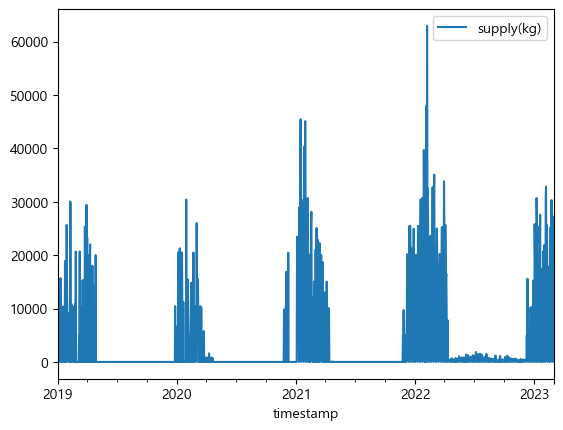

In [24]:
train[(train['item'] == 'CR') & (train['corporation'] == 'A') & (train['location'] == 'J')][['timestamp','supply(kg)']].plot(x='timestamp')

In [9]:
train[train['item'] == 'TG']

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
15225,TG_E_S_20230227,2023-02-27,TG,E,S,24204.0,3418.0
15226,TG_E_S_20230228,2023-02-28,TG,E,S,13587.0,3141.0
15227,TG_E_S_20230301,2023-03-01,TG,E,S,16187.0,4235.0
15228,TG_E_S_20230302,2023-03-02,TG,E,S,17830.0,3960.0


In [10]:
test

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J
...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J
1088,RD_F_J_20230328,2023-03-28,RD,F,J
1089,RD_F_J_20230329,2023-03-29,RD,F,J
1090,RD_F_J_20230330,2023-03-30,RD,F,J
